## Data analaysis of Freda intraclasts and BRa section paleomagnetism

### Import scientific python packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import functions from pmagpy (https://github.com/PmagPy/PmagPy)

In [2]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

### Import BRIC data

In [3]:
BRIC_data_all = pd.read_csv('../Data/BRIC/specimens.txt', sep='\t', skiprows=1)
BRIC_data = BRIC_data_all.loc[BRIC_data_all.result_quality == 'g']

In [4]:
BRIC_data_tc = BRIC_data.loc[BRIC_data['dir_tilt_correction']==100.]
BRIC_MT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='MT']
BRIC_MHT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='MHT']
BRIC_HT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='HT']

Plot data and calculate means

In [5]:
BRIC_MT_MHT_dec = BRIC_MT_tc.dir_dec.tolist() + BRIC_MHT_tc.dir_dec.tolist()
BRIC_MT_MHT_inc = BRIC_MT_tc.dir_inc.tolist() + BRIC_MHT_tc.dir_inc.tolist()

BRIC_MT_mean = ipmag.fisher_mean(BRIC_MT_MHT_dec, BRIC_MT_MHT_inc)
ipmag.print_direction_mean(BRIC_MT_mean)

Dec: 252.4  Inc: -12.5
Number of directions in mean (n): 37
Angular radius of 95% confidence (a_95): 6.6
Precision parameter (k) estimate: 13.6


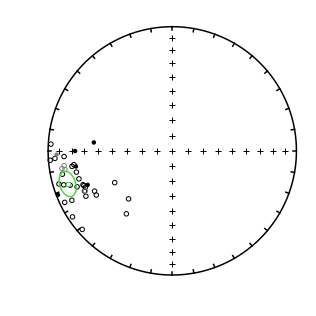

In [6]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRIC_MT_tc.dir_dec.tolist(), BRIC_MT_tc.dir_inc.tolist(), color='k')
ipmag.plot_di(BRIC_MHT_tc.dir_dec.tolist(), BRIC_MHT_tc.dir_inc.tolist(), color='grey')
ipmag.plot_di_mean(BRIC_MT_mean['dec'], BRIC_MT_mean['inc'], BRIC_MT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRIC_MT_MHT_dirs.pdf')
plt.show()

In [7]:
Michipicoten_Pole_direction = pmag.vgp_di(17.0,174.7,46.39,360-90.64)
Nonesuch_Pole_direction = pmag.vgp_di(7.3,174.7,46.39,360-90.64)
Freda_Pole_direction = pmag.vgp_di(2.2,179,46.39,360-90.64)
Freda_Pole_direction[0]

271.77830791119061

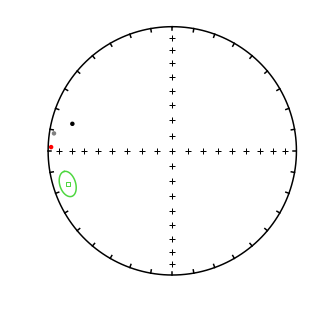

In [8]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(Michipicoten_Pole_direction[0], Michipicoten_Pole_direction[1], color='black')
ipmag.plot_di(Nonesuch_Pole_direction[0], Nonesuch_Pole_direction[1], color='grey')
ipmag.plot_di(Freda_Pole_direction[0], Freda_Pole_direction[1], color='red')
ipmag.plot_di_mean(BRIC_MT_mean['dec'], BRIC_MT_mean['inc'], BRIC_MT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRIC_MT_MHT_dirs.pdf')
plt.show()

In [9]:
BRIC_HT_mean = ipmag.fisher_mean(BRIC_HT_tc.dir_dec.tolist(), BRIC_HT_tc.dir_inc.tolist())
ipmag.print_direction_mean(BRIC_HT_mean)

Dec: 230.9  Inc: -20.5
Number of directions in mean (n): 27
Angular radius of 95% confidence (a_95): 33.9
Precision parameter (k) estimate: 1.7


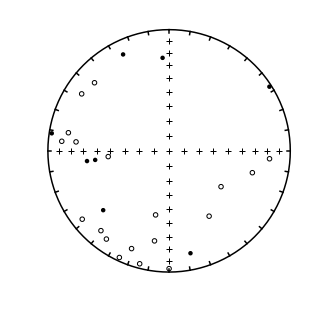

In [10]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRIC_HT_tc.dir_dec.tolist(), BRIC_HT_tc.dir_inc.tolist(), color='k')
plt.savefig('code_output/BRIC_HT_dirs.pdf')
plt.show()

The high-temperature directions are more dispersed in declination than inclination.

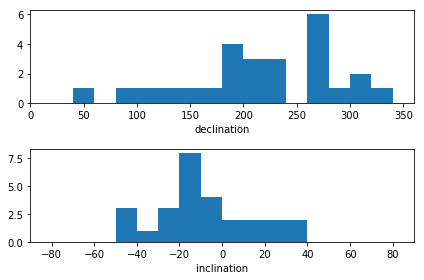

In [11]:
plt.subplot(2,1,1)
plt.hist(BRIC_HT_tc.dir_dec.tolist(),range(0,360,20))
plt.xlim(0,360)
plt.xlabel('declination')
plt.subplot(2,1,2)
plt.hist(BRIC_HT_tc.dir_inc.tolist(),range(-90,90,10))
plt.xlim(-90,90)
plt.xlabel('inclination')
plt.tight_layout()
plt.show()

In [12]:
print(np.mean(BRIC_HT_tc.dir_dec.tolist()))
print(np.std(BRIC_HT_tc.dir_dec.tolist()))
print('')
print(np.mean(BRIC_HT_tc.dir_inc.tolist()))
print(np.std(BRIC_HT_tc.dir_inc.tolist()))

220.781481481
72.7878858309

-8.98148148148
22.852960535


The data are not consistent with an entirely random distribution

In [13]:
ipmag.conglomerate_test_Watson(BRIC_MT_mean['r'],BRIC_MT_mean['n'])

R = 34.3548953767
Ro_95 = 9.8175862614
Ro_99 = 11.8288489155
The null hypothesis of randomness can be rejected at the 95% confidence level
The null hypothesis of randomness can be rejected at the 99% confidence level


{'n': 37,
 'R': 34.354895376665695,
 'Ro_95': 9.8175862613984712,
 'Ro_99': 11.828848915539782}

In [14]:
ipmag.conglomerate_test_Watson(BRIC_HT_mean['r'],BRIC_HT_mean['n'])

R = 11.3039446687
Ro_95 = 8.3865964491
Ro_99 = 10.1047018759
The null hypothesis of randomness can be rejected at the 95% confidence level
The null hypothesis of randomness can be rejected at the 99% confidence level


{'n': 27,
 'R': 11.303944668686482,
 'Ro_95': 8.3865964490966185,
 'Ro_99': 10.104701875859574}

### Import BRa data

In [39]:
BRa_data_all = pd.read_csv('../Data/BRa/specimens.txt', sep='\t', skiprows=1)
BRa_data = BRa_data_all.loc[BRa_data_all.result_quality == 'g']

In [40]:
BRa_data_tc = BRa_data.loc[BRa_data['dir_tilt_correction']==100.]
BRa_MT_tc = BRa_data_tc.loc[BRa_data_tc['dir_comp']=='MT']
BRa_HT_tc = BRa_data_tc.loc[BRa_data_tc['dir_comp']=='HT']

In [41]:
BRa_MT_mean = ipmag.fisher_mean(BRa_MT_tc.dir_dec.tolist(), BRa_MT_tc.dir_inc.tolist())
ipmag.print_direction_mean(BRa_MT_mean)

Dec: 256.5  Inc: -12.7
Number of directions in mean (n): 33
Angular radius of 95% confidence (a_95): 3.6
Precision parameter (k) estimate: 49.1


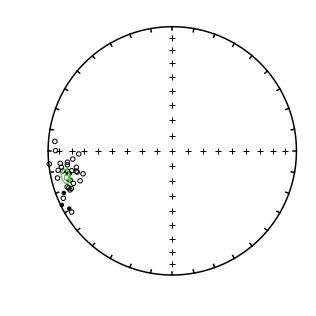

In [42]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRa_MT_tc.dir_dec.tolist(), BRa_MT_tc.dir_inc.tolist(), color='k')
ipmag.plot_di_mean(BRa_MT_mean['dec'], BRa_MT_mean['inc'], BRa_MT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRa_MT_dirs.pdf')
plt.show()

In [43]:
BRa_HT_mean = ipmag.fisher_mean(BRa_HT_tc.dir_dec.tolist(), BRa_HT_tc.dir_inc.tolist())
ipmag.print_direction_mean(BRa_HT_mean)

Dec: 247.0  Inc: 3.2
Number of directions in mean (n): 34
Angular radius of 95% confidence (a_95): 5.5
Precision parameter (k) estimate: 21.0


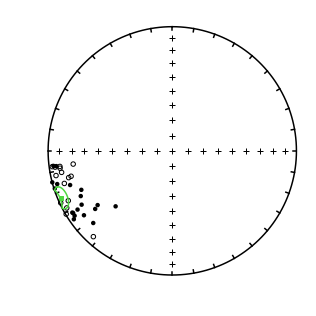

In [44]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRa_HT_tc.dir_dec.tolist(), BRa_HT_tc.dir_inc.tolist(), color='k')
ipmag.plot_di_mean(BRa_HT_mean['dec'], BRa_HT_mean['inc'], BRa_HT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRa_HT_dirs.pdf')
plt.show()

## Plot demagnetization data

In [45]:
BRIC_measurements_all = pd.read_csv('../Data/BRIC/measurements.txt', sep='\t', skiprows=1)
BRIC_measurements = BRIC_measurements_all.loc[BRIC_measurements_all.quality == 'g']

In [46]:
BRIC_measurements_BRIC31 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.31a']
BRIC_measurements_BRIC31.reset_index(inplace=True)
BRIC_measurements_BRIC33 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.33a']
BRIC_measurements_BRIC33.reset_index(inplace=True)
BRIC_measurements_BRIC41 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.41a']
BRIC_measurements_BRIC41.reset_index(inplace=True)

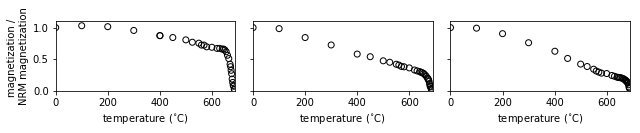

In [47]:
plt.figure(figsize=(9,1.8))
plt.subplot(1,3,1)
plt.scatter(BRIC_measurements_BRIC31.treat_temp-273,
            BRIC_measurements_BRIC31.magn_moment/BRIC_measurements_BRIC31.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlabel('temperature ($^{\circ}$C)')
plt.subplot(1,3,2)
plt.scatter(BRIC_measurements_BRIC33.treat_temp-273,
            BRIC_measurements_BRIC33.magn_moment/BRIC_measurements_BRIC33.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.subplot(1,3,3)
plt.scatter(BRIC_measurements_BRIC41.treat_temp-273,
            BRIC_measurements_BRIC41.magn_moment/BRIC_measurements_BRIC41.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.savefig('./code_output/demag.svg')
plt.show()

In [48]:
BRa_measurements_all = pd.read_csv('../Data/BRa/measurements.txt', sep='\t', skiprows=1)
BRa_measurements = BRa_measurements_all.loc[BRa_measurements_all.quality == 'g']

In [49]:
BRa_measurements_BRa3 = BRa_measurements[BRa_measurements.specimen == 'BRa.3a']
BRa_measurements_BRa3 = BRa_measurements_BRa3[BRa_measurements_BRa3.quality=='g']
BRa_measurements_BRa3.reset_index(inplace=True)
BRa_measurements_BRa27 = BRa_measurements[BRa_measurements.specimen == 'BRa.27a']
BRa_measurements_BRa27 = BRa_measurements_BRa27[BRa_measurements_BRa27.quality=='g']
BRa_measurements_BRa27.reset_index(inplace=True)

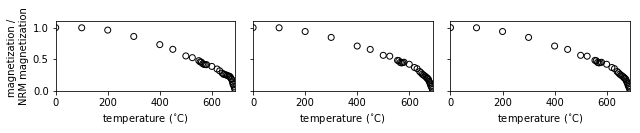

In [50]:
plt.figure(figsize=(9,1.8))
plt.subplot(1,3,1)
plt.scatter(BRa_measurements_BRa3.treat_temp-273,
            BRa_measurements_BRa3.magn_moment/BRa_measurements_BRa3.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlabel('temperature ($^{\circ}$C)')
plt.subplot(1,3,2)
plt.scatter(BRa_measurements_BRa27.treat_temp-273,
            BRa_measurements_BRa27.magn_moment/BRa_measurements_BRa27.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.subplot(1,3,3)
plt.scatter(BRa_measurements_BRa27.treat_temp-273,
            BRa_measurements_BRa27.magn_moment/BRa_measurements_BRa27.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.savefig('./code_output/demag_BRa.svg')
plt.show()

In [37]:
poles = pd.read_csv('./code_input/Laurentia_poles.csv')
poles = poles[10:33]

In [56]:
site_lat = 46.38
site_lon = -90.64
Freda_HT_pole = pmag.dia_vgp(BRa_HT_mean['dec'], BRa_HT_mean['inc'],
                             BRa_HT_mean['alpha95'],site_lat,site_lon)
Freda_MT_pole = pmag.dia_vgp(BRa_MT_mean['dec'], BRa_MT_mean['inc'],
                             BRa_MT_mean['alpha95'],site_lat,site_lon)
Freda_MT_pole

(184.74928151127628, -13.960352524941069, 1.8701565173505528, 3.67213660240781)

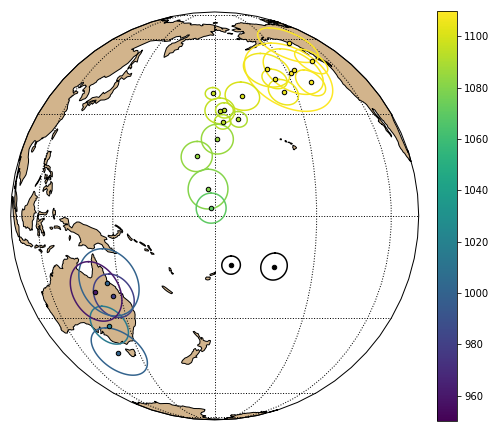

In [58]:
import matplotlib
import matplotlib.colors as colors

map_axis = ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=950, vmax=1110)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(map_axis,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
#plt.savefig('Plots/Kewee_Track_Grenville_Loop.pdf')

ipmag.plot_pole(map_axis,Freda_MT_pole[0],Freda_MT_pole[1],np.sqrt(Freda_MT_pole[2]*Freda_MT_pole[3]))
ipmag.plot_pole(map_axis,Freda_HT_pole[0],Freda_HT_pole[1],np.sqrt(Freda_HT_pole[2]*Freda_HT_pole[3]))


plt.show()